# Homework 4: Support Vector Machines

**Due date: 6th March 2024, 11:59 pm**

## Setup

To run and solve this assignment, you must have access to a working Jupyter Notebook installation. We recommend Google Colab. If you are already familiar with Jupyter and have your own installation, you may use it; however, you will have to tweak Colab-specific commands we've entered here (for example, file uploads).

To use Google Colab:

1. Download this `ipynb` file.
2. Navigate to https://colab.research.google.com/ and select `Upload` in the pop-up window.
3. Upload this file. It will then open in Colab.

The below statements assume that you have already followed these instructions. If you need help with Python syntax, NumPy, or Matplotlib, you might find Week 1 discussion material useful.

To run code in a cell or to render Markdown+LaTeX press Ctrl+Enter or "`Run`" button above. To edit any code or text cell, double-click on its content. Put your solution into boxes marked with **`[double click here to add a solution]`** and press Ctrl+Enter to render text. You can add cells via `+` sign at the top left corner.

**Submission instructions**: please upload your completed solution file as well as a scan of any handwritten answers to Gradescope by **6th March 2024, 11:59 pm**.

## **Question 1:** Binary Classification with SVMs (55 pts)

In this problem, you will gain intuition surrounding Support Vector Machines by solving a simple 2D case by hand.

Suppose you have the following dataset:

$ \vec{x_P} = (0,3)^T, \vec{x_Q} = (-2,1)^T$ With label $y=-1$

$ \vec{x_R} = (2,-2)^T, \vec{x_S} = (3,-6)^T$ With label $y=+1$




#### **1.1**
What is the mathematical intuition behind the notion of maximizing the margin in Support Vector Machines (SVMs)? How does this result in a better classifier?

Models with larger margins generalize better and are less prone to overfit. This is because a model with a narrow margin separates data, but just barely. There is very little "breathing room" and with the introduction of new data to test against, it may misclassify data as a result of having such a narrow margin. 




**Answer**



#### **1.2**
How does the choice of the regularization parameter affect the performance of an SVM classifier?

A smaller regularization parameter allows the tradeoff of misclassifying a few more points in exchange for having a wider margin. This allows for a "soft margin" that misclassifies some points for the purpose of maintaining a wide margin that is more general and handles testing and validation data better. Soft margins also help prevent overfitting.

**Answer**


#### **1.3**
Can SVM be used for regression problems? Explain.

As we have studied it, not really. Since SVM is mainly used to create a separating hyperplane, this would be considered classification instead of regression. However, there is apparently something called Support Vector Regression which uses support vectors, in this case understood as data outliers, to make sure that the hyperplane is adequetley nearby most of the data using the support vectors as reference.

**Answer**



### **1.4**
Sketch the points in the x1-x2 plane.

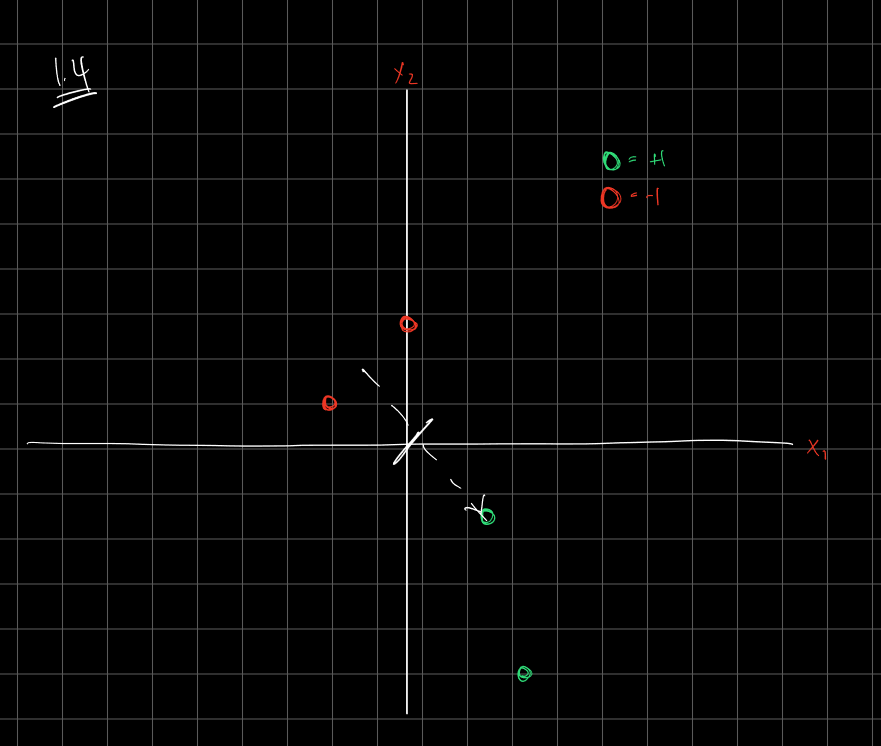

**Answer**

### **1.5**
Given the hyperplane parameterized by $\vec{w}=(0,6)^T, b=-9$, sketch it and compute the parameters in canonical form.

Let the hyperplane parameterized by $(\vec{w}, b)$ linearly separate the dataset $D$. We say $(\vec{w}, b)$ is in **canonical form** if:

$min_j y_j(\vec{w}^T\vec{x_i}+b) = min_j|\vec{w}^T\vec{x_i}+b| = 1 $

**Answer**
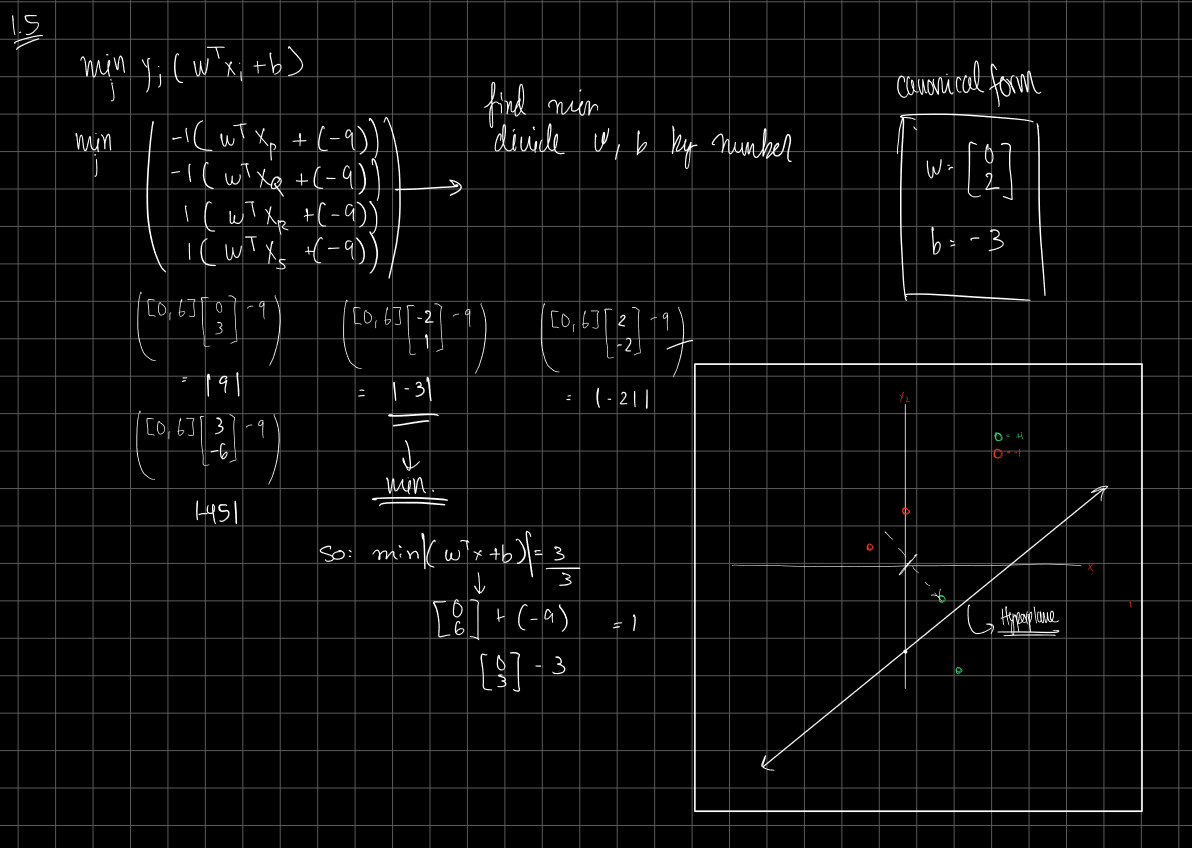

### **1.6**
Compute the parameters of the hyperplane passing through $\vec{x_P}$ and $\vec{x_Q}$ and add it to your picture.

**Answer**
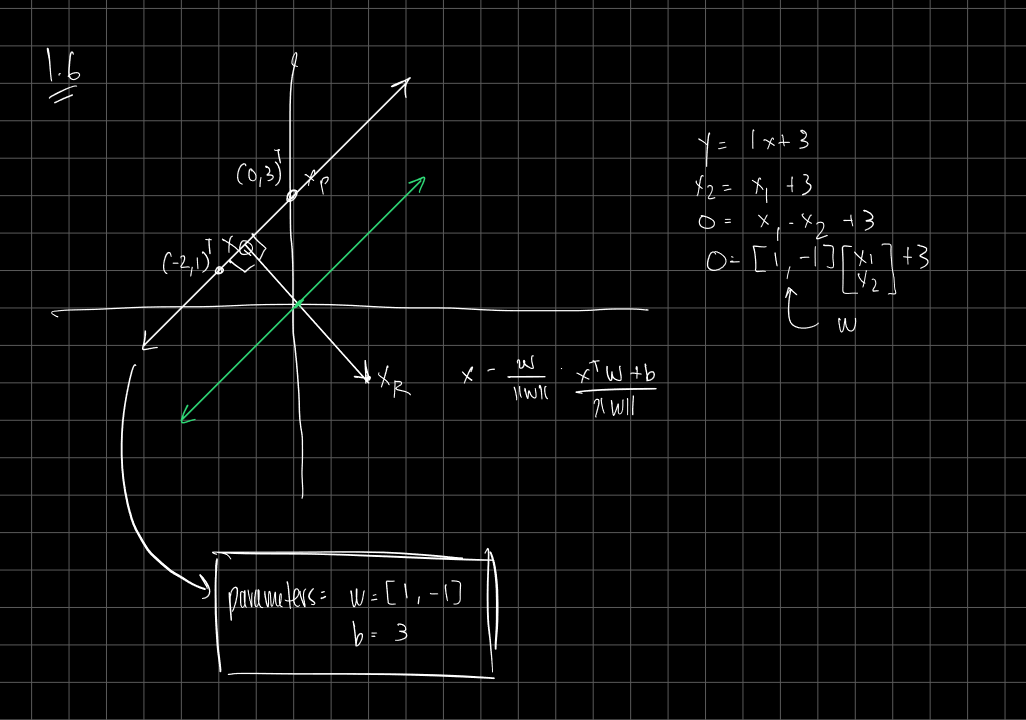

### **1.7**
Compute the orthogonal projection of $\vec{x_R}$ onto the hyperplane in question 1.3

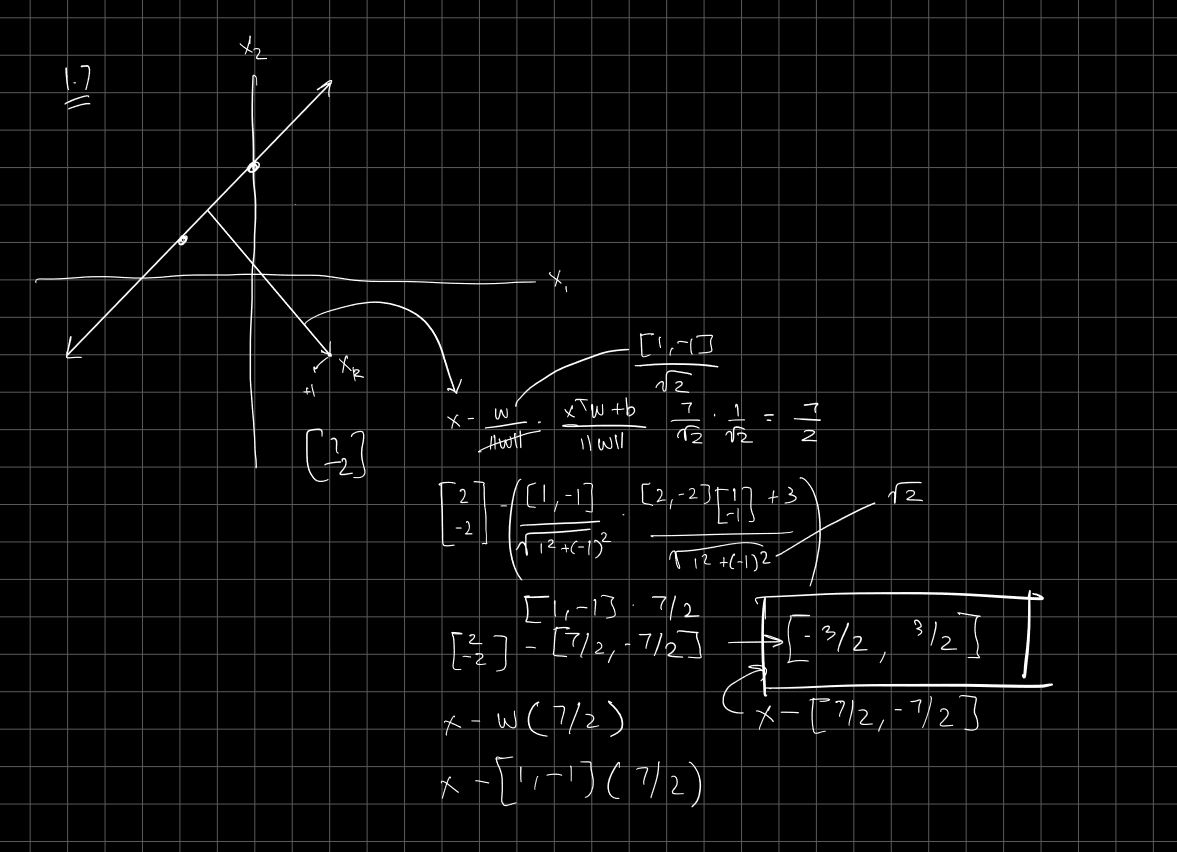

**Answer**


### **1.8**
Compute the parameters of the maximum margin linearly separating hyperplane (SVM hyperplane) in canonical form. Sketch the hyperplane.


**Answer**


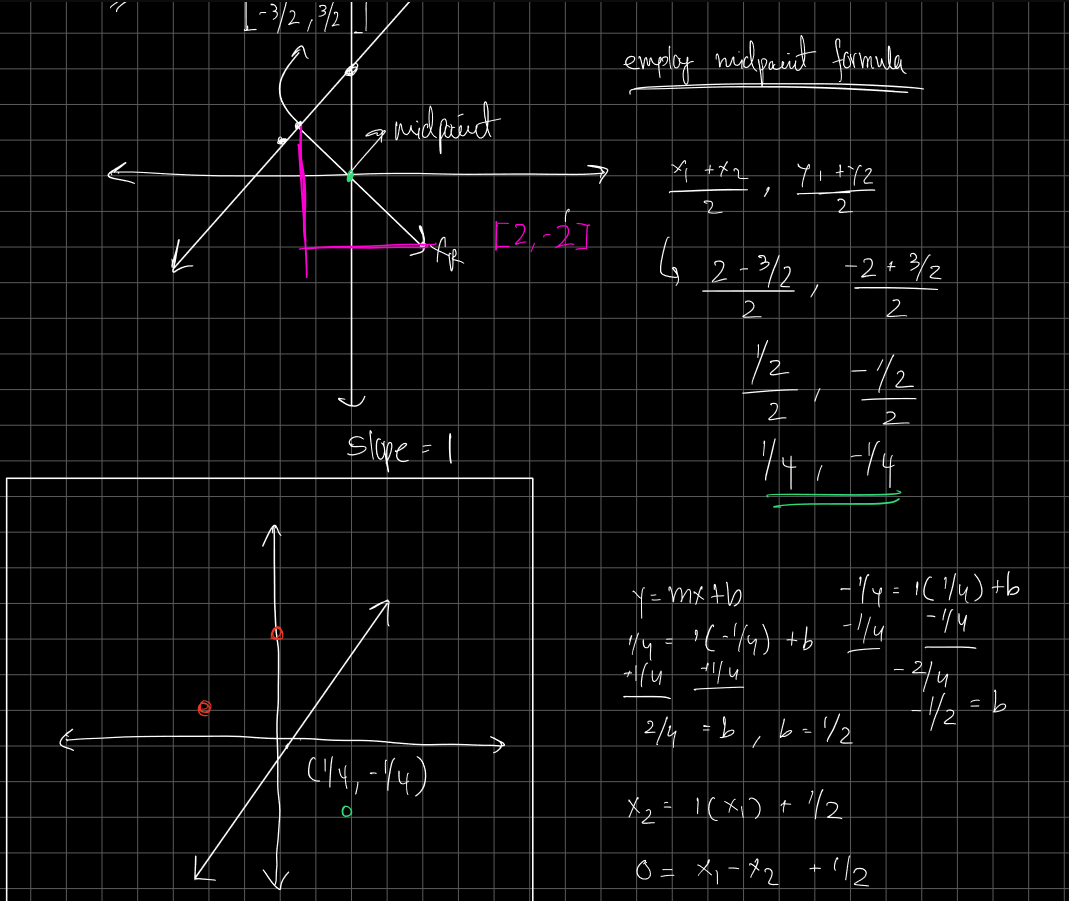
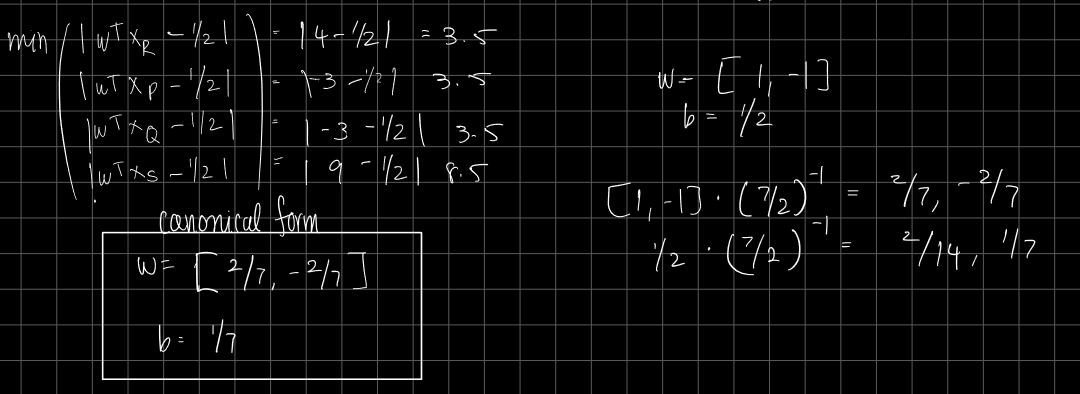

### **1.9**
Let $\vec{w_{SVM}} = -\alpha_{P}\vec{x_P} - \alpha_{Q}\vec{x_Q} + \alpha_{R}\vec{x_R} + \alpha_{S}\vec{x_S}$. Hand compute the $\alpha$ values.

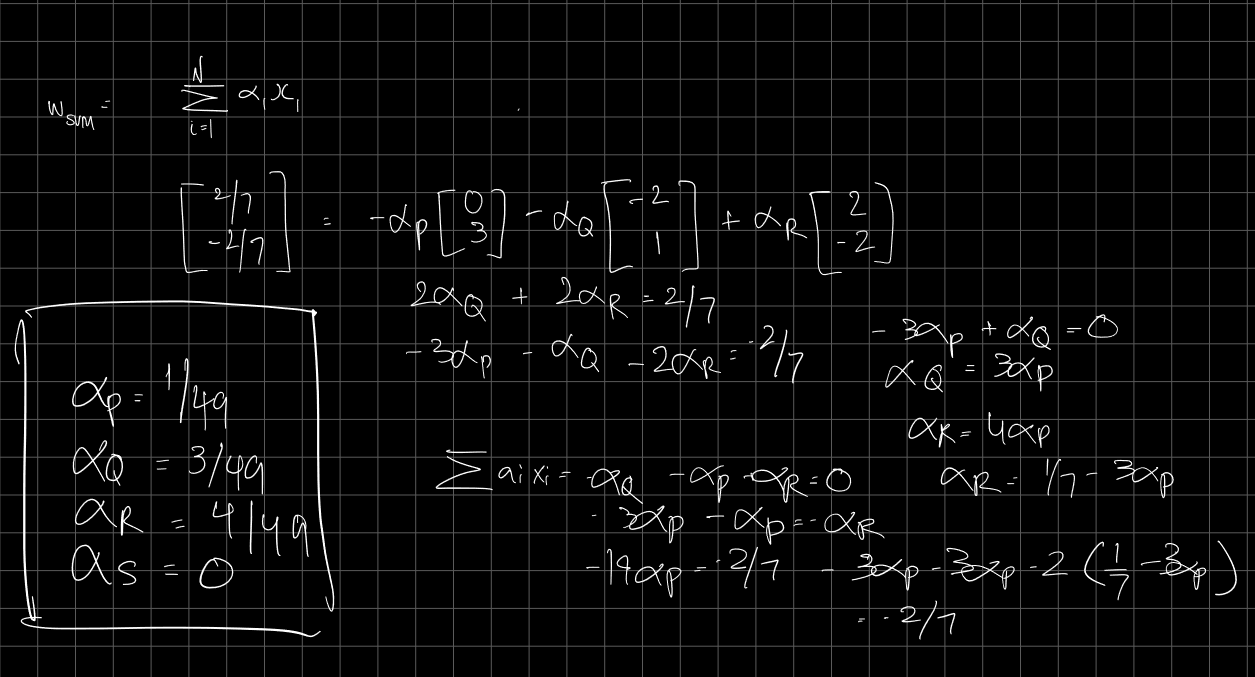

**Answer**


### **1.10**
Suppose we added another point $ \vec{x_T} = (0,4)^T$ with label $y=+1$.
Plot the updated data and discuss how we would go about applying SVM in this case?

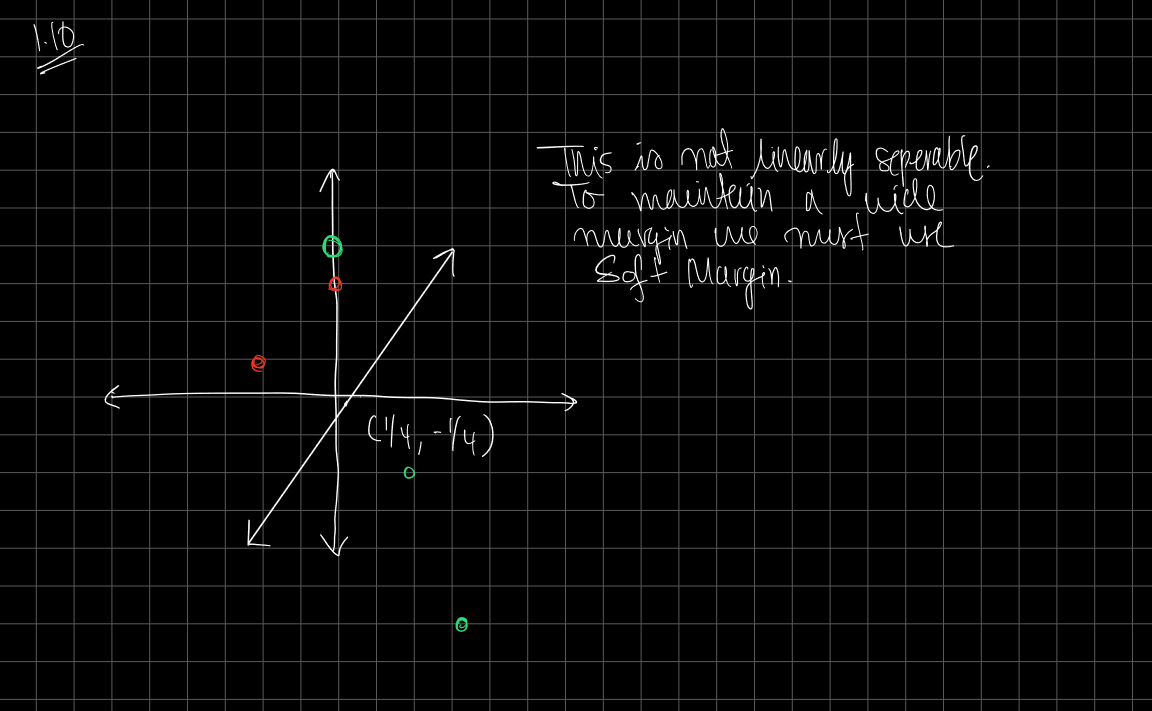

**Answer**

We should use soft margin SVM since this is not linearly seperable, by allowing a misclassocation of a point we can maintain a wide margin for generality of the model.

In [313]:
%pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [314]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
%matplotlib inline

## **Question 2:** Feature Mapping (60 pts)

*Feature mapping* refers to the process of transforming the original input features of a dataset into a new set of features that may be more suitable for a particular learning task. In the context of support vector machines (SVMs), *feature mapping* is often used to transform the input features into a higher-dimensional space, where the data may become more separable.

In this question, we will see an example of feature mapping. The following code cell generates 500 data points consisiting of 2 classes. Refer to [this page](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html) to know more about sklearn's make_circles() function.

In [315]:
# DO NOT CHANGE THIS CELL, JUST RUN IT
def generate_nonlinear_data(num_samples=500, noise=0.1, factor=0.5, random_state=None):
    """
    Generate non-linear data using make_circles.

    Parameters:
    - num_samples (int): Number of samples to generate.
    - noise (float): Standard deviation of Gaussian noise added to the data.
    - factor (float): Scale factor between inner and outer circle.
    - random_state (int, RandomState instance, default=None): Controls random number generation.

    Returns:
    - X (array-like, shape (n_samples, 2)): The generated samples.
    - y (array-like, shape (n_samples,)): The integer labels (0 or 1) for class membership of each sample.
    """
    X, y = make_circles(n_samples=num_samples, noise=noise, factor=factor, random_state=random_state)
    return X, y

**Visualize the generated dataset.**

In [316]:
import matplotlib.pyplot as plt

def visualize_data(X, y):
    """
    Visualize the given data.

    Parameters:
    - X (array-like, shape (n_samples, 2)): The samples to visualize.
    - y (array-like, shape (n_samples,)): The integer labels (0 or 1) for class membership of each sample.

    Returns:
    - nothing
    """
    # Visualize the original data
    plt.figure(figsize=(8, 6))

    # print(X)
    print(y)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Label 0')#filter by labels
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Label 1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Visualization of Data')
    plt.legend()
    plt.show()


[1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1
 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0
 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0
 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1
 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1
 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0
 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1
 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1
 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0
 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0
 0 1 0 1 0 1 1 0 1 0 1 0 

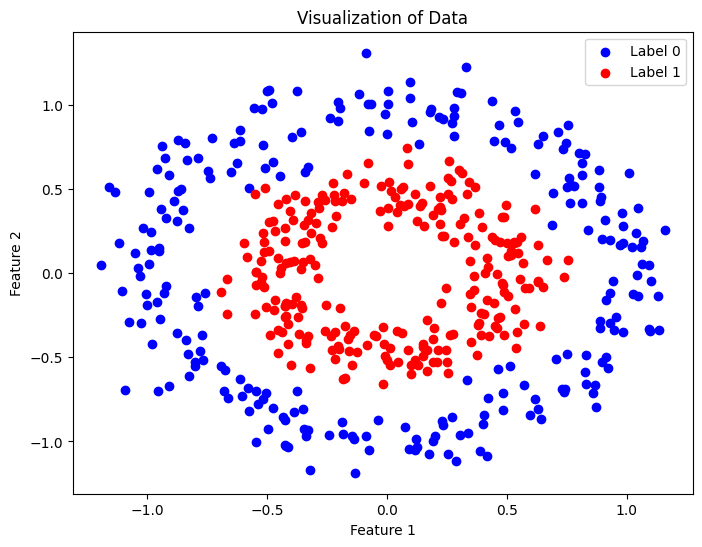

In [317]:
# DO NOT CHANGE THIS CELL, JUST RUN IT
# Generate data
X, y = generate_nonlinear_data(num_samples = 500, noise=0.1, factor=0.5, random_state=42)

# Visualize the data
visualize_data(X, y)

**Now we split the data into training and testing partitions.**

In [318]:
# DO NOT CHANGE THIS CELL, JUST RUN IT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Now, you will define a function **svm_models()** to call a Support Vector Classifier model (which you will use for the rest of this assignment). The function signate is as follows:
<ol>
    <li>The function should be able to return a <b>Support Vector Classifier</b>.</li>
    <li>The arguments in the SVC must be passed through the function arguments.</li>
</ol>

**Hint**: Some arguments needed for SVC with RBF kernel might not be needed for SVC with Linear kernel. For such cases, you can initialize the function **default arguments** so that whenever you don't need a particular argument for a model, you can just ignore that argument.

In [319]:
def svm_models(kernel="linear", C=1.0, gamma="auto", degree=1):
    """
    Define SVM models with different kernels.

    Parameters:
    - kernel (str): Specifies the kernel type to be used in the algorithm ('linear', 'rbf', 'poly').
    - C (float): Regularization parameter. The strength of the regularization is inversely proportional to C.
    - gamma (float or 'auto'): Kernel coefficient for 'rbf' and 'poly'. If 'auto', uses 1/n_features.
    - degree (int): Degree of the polynomial kernel. Ignored by other kernels.

    Returns:
    - model: SVM model configured with the specified parameters.
    """
    # ADD CODE HERE
    # Defining svm_models() function
    # Don't forget everything mentioned above

    #uhhhh
    return svm.SVC(kernel=kernel, C=C, gamma=gamma, degree=degree)
    



**Call svm_models() to inititalize a Support Vector Classifier (SVC) model and train it on the training data. Refer to [this page](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for the documentation.**

In [320]:
def train_svm(X_train, y_train, kernel="linear", C=1.0, gamma="auto", degree=1):
    """
    Initialize and train an SVM model.

    Parameters:
    - X_train (array-like, shape (n_samples, n_features)): Training samples.
    - y_train (array-like, shape (n_samples,)): Training labels.
    - kernel (str): Specifies the kernel type to be used in the algorithm ('linear', 'rbf', 'poly').
    - C (float): Regularization parameter. The strength of the regularization is inversely proportional to C.
    - gamma (float or 'auto'): Kernel coefficient for 'rbf' and 'poly'. If 'auto', uses 1/n_features.
    - degree (int): Degree of the polynomial kernel. Ignored by other kernels.

    Returns:
    - model: Trained SVM model.
    """
    # ADD CODE HERE
    # Initialize the SVC model
    # Then, train the initialized model using the training data
    classifier = svm_models(C=C, kernel=kernel, gamma=gamma, degree=degree)
    classifier.fit(X_train, y_train)
    return classifier


In [321]:
# DO NOT CHANGE THIS CELL, JUST RUN IT
trained_model = train_svm(X_train, y_train, kernel="linear", C=1.0)
print(trained_model)

SVC(degree=1, gamma='auto', kernel='linear')


**Calculate and print the test accuracy of the SVC model.**

In [322]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluate the performance of a trained model on test data.

    Parameters:
    - model: Trained model.
    - X_test (array-like, shape (n_samples, n_features)): Test samples.
    - y_test (array-like, shape (n_samples,)): Test labels.

    Returns:
    - accuracy (float): Accuracy of the model on the test data.
    """
    # ADD CODE HERE
    # Use model.score() to find the model's test accuracy
    # Print the accuracy
    accriate = model.score(X_test, y_test)
    print(accriate)


In [323]:
# DO NOT CHANGE THIS CELL, JUST RUN IT
# print(X_test)
test_accuracy = evaluate_model(trained_model, X_test, y_test)

0.52


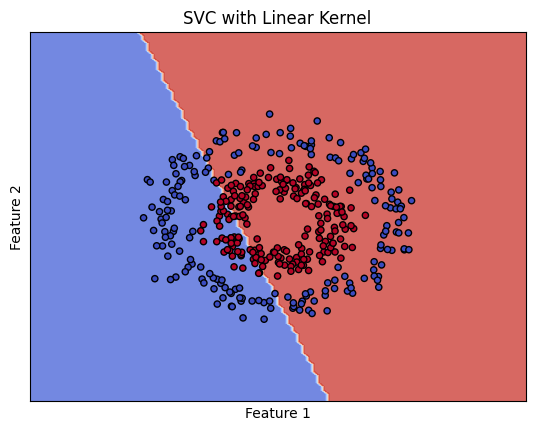

In [324]:
# DO NOT CHANGE THIS CELL, JUST RUN IT
def plot_decision_boundary(model, X_train, y_train):
    """
    Plot the decision boundary of the trained model along with the training data.

    Parameters:
    - model: Trained model.
    - X_train (array-like, shape (n_samples, n_features)): Training samples.
    - y_train (array-like, shape (n_samples,)): Training labels.
    """
    ax = plt.axes()

    disp = DecisionBoundaryDisplay.from_estimator(
            model,
            X_train,
            response_method="predict",
            cmap=plt.cm.coolwarm,
            alpha=0.8,
            ax=ax,
            xlabel="Feature 1",
            ylabel="Feature 2",
        )

    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title("SVC with Linear Kernel")
    plt.show()

plot_decision_boundary(trained_model, X_train, y_train)

**Why do you think the model performs poorly on this data?**

**Answer**

The linear kernel is also known as the "non kernal" where the data is not projected into a higher dimensional space. 
Thus, our data becomes difficult to separate as it is not linearly seperable in the dimensions it exists in right now.

As we saw, the performance of our linear SVM model was poor on the original dataset. The model's accuracy was 52%. It means that our model was only able to guess the class even after training. In the following few code cells, we'll see the power of Feature Transformation. **In the following code cell, you will have to create a feature transformation of the following form**:
$$\phi(x_1, x_2) = \begin{bmatrix} (x_1)^2 \\ (x_2)^2 \\ 2x_1x_2 \end{bmatrix}$$
where $\phi(x_1, x_2)$ is the feature transformation function that takes as input a 2D dataset and outputs a 3D mapping of the same data.

In [325]:
def feature_mapping(X):
    """
    Perform feature mapping to transform 2D data to 3D.

    Parameters:
    - X (array-like, shape (n_samples, 2)): Input 2D data.

    Returns:
    - X_new (array-like, shape (n_samples, 3)): Transformed 3D data.
    """
    # print(X)
    # ADD CODE HERE
    # Create and return a transformed dataset
    # The transformation must be according to the phi function shown above
    # Try taking the transpose of the row vector instead of creating a column vector
    # Return the transformed data
    X_new = []
    for i in X:
        # print(i)
        zero = i[0]**2
        one = i[1]**2
        toappend = np.array([zero, one, 2*i[0]*i[1]])
        toappend = toappend.T
        X_new.append((toappend))
    return np.array(X_new)

# feature_mapping(X_train)[0].shape

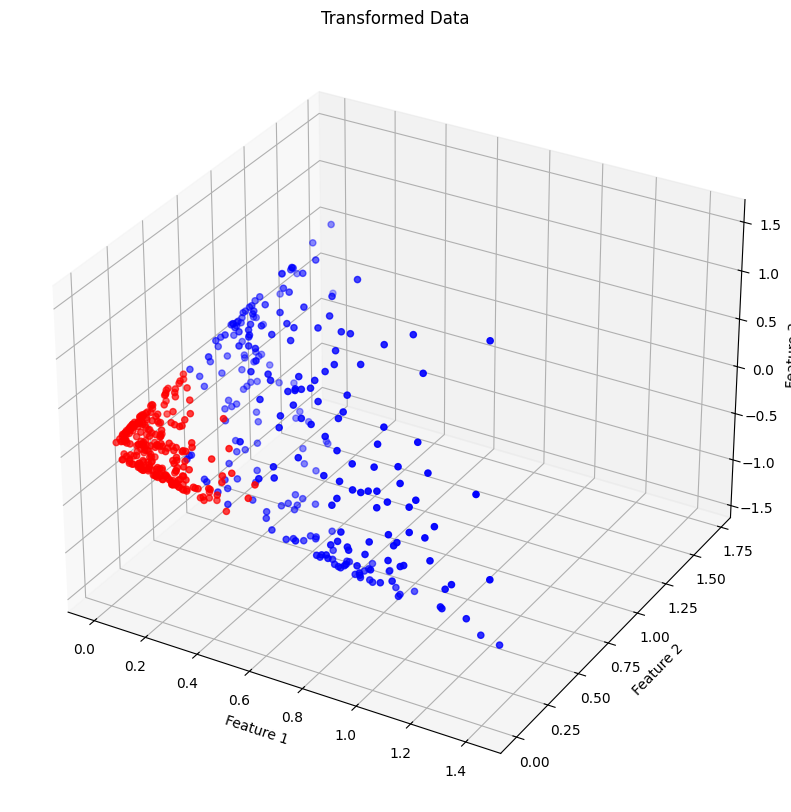

In [326]:
# DO NOT CHANGE THIS CELL, JUST RUN IT
def visualize_transformed_data(X_new, y):
    """
    Visualize the transformed 3D data.

    Parameters:
    - X_new (array-like, shape (n_samples, 3)): Transformed 3D data.
    - y (array-like, shape (n_samples,)): Labels for the data.
    """
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, cmap='bwr')
    ax.set_title("Transformed Data")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_zlabel("Feature 3")
    plt.show()

X_new = feature_mapping(X)
visualize_transformed_data(X_new, y)

As it can be seen, the data is clearly linearly seperable after the transformation.

**Now we split this transformed data into training and testing partitions. (Remember, the y vector i.e. the predictions have not changed. It's only the input X that has changed/transformed).**

In [327]:
# DO NOT CHANGE THIS CELL, JUST RUN IT
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

**Call train_svm to inititalize and train an SVC model on this newly transformed data. Then call evaluate_model to print the test accuracy of this newly trained SVC model.**



In [328]:
# ADD CODE HERE
# The parameters of the model must be the same as earlier
# If the parameters are not the same, it won't be the same model
# Call your earlier functions train_svm and evaluate_model (similar to what we did for you earlier)
# You must use the given variable names to store the model and accuracy!!

transformed_model = train_svm(X_train, y_train, kernel="linear", C=1.0, gamma="auto", degree=1)

transformed_accuracy = evaluate_model(transformed_model, X_test, y_test)

0.97


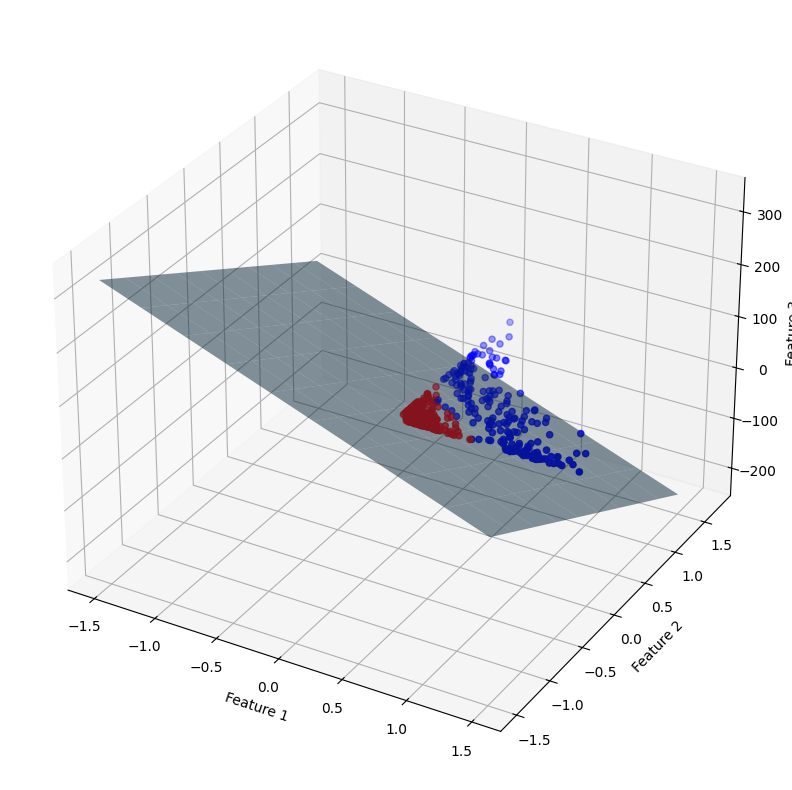

In [329]:
# DO NOT CHANGE THIS CELL, JUST RUN IT
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 10), np.linspace(-1.5, 1.5, 10))
zz = (-transformed_model.intercept_[0] - transformed_model.coef_[0][0]*xx - transformed_model.coef_[0][1]*yy) / transformed_model.coef_[0][2]

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c = y_train, cmap='bwr')

ax.plot_surface(xx, yy, zz, alpha=0.5)

# Set the labels of the axes
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Show the plot
plt.show()

## **Question 3:** Kernels in SVMs (40 pts)

When data is not linearly separable in the original feature space, SVMs can use a technique called the *kernel trick* to transform the data into a higher-dimensional space where it becomes more separable.

The *kernel function* used in SVMs effectively implements a feature mapping. It maps the input data into a new feature space, where the transformed data may be linearly separable. The choice of kernel function and its parameters are crucial to the performance of SVMs, and selecting an appropriate kernel function is often an important part of building an SVM model. Some commonly used kernel functions include Linear, Polynomial, and Radial Basis Function (RBF).

The following code cell generates 5000 data points consisiting of 3 classes. Refer to [this page](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) to know more about sklearn's make_classification() function.

In [330]:
# DO NOT CHANGE THIS CELL, JUST RUN IT
# generate non-linear data with 4 classes
X, y = make_classification(n_samples=5000, n_features=2, n_classes=3, n_clusters_per_class=1, n_informative=2, n_redundant=0, random_state=7896)

**Now we visualize the generated dataset.**

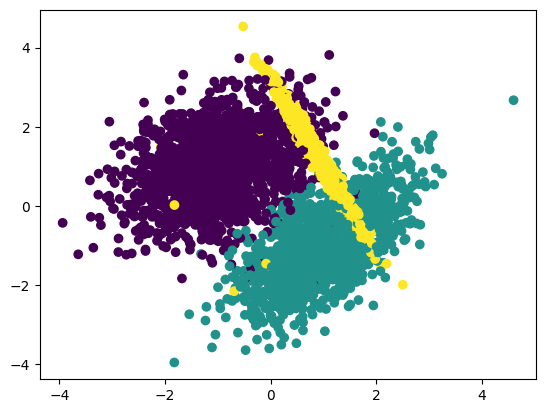

In [331]:
# DO NOT CHANGE THIS CELL, JUST RUN IT
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

**Now we split the data into training and testing partitions.**

In [332]:
# DO NOT CHANGE THIS CELL, JUST RUN IT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Call train_svm to inititalize a Support Vector Classifier (SVC) model and train it on the training data. Then find the test accuracy using linear_svm.score and print it.**

In [333]:
# ADD CODE HERE
# The parameters of the model must be the same as earlier
# If the parameters are not the same, it won't be the same model
# Call your earlier function train_svm
# Then use linear_svm.score() to find the model's test accuracy
# Print the accuracy
# You must use the given variable names to store the model and accuracy!!

linear_svm = train_svm(X_train, y_train, kernel="linear")
linear_svm_accuracy = linear_svm.score(X_test, y_test)
print("Linear SVM Model Performance:", linear_svm_accuracy)

Linear SVM Model Performance: 0.869


Text(0.5, 1.0, 'SVC with Linear Kernel')

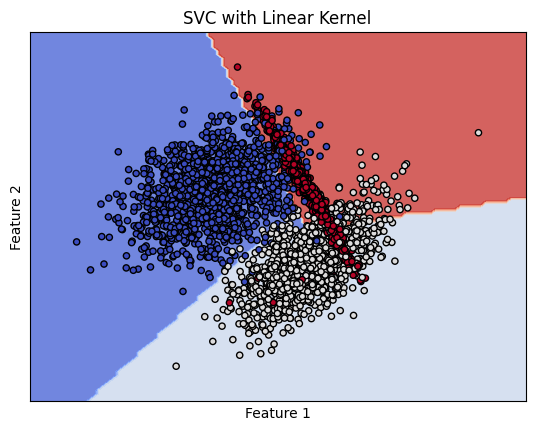

In [334]:
# DO NOT CHANGE THIS CELL, JUST RUN IT
ax = plt.axes()

disp = DecisionBoundaryDisplay.from_estimator(
        linear_svm,
        X_train,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel="Feature 1",
        ylabel="Feature 2",
    )


ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = plt.cm.coolwarm, s = 20, edgecolors = "k")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("SVC with Linear Kernel")

As we can see, the linear SVM performs pretty well on this data. The accuracy of the model is **86.9%**. Can you think of improving the performance of the model? If so, how?<br>
**Hint**: Look at the composition of the data. Does it look like linearly seperable data?

**Answer**

In these dimensions, the data does not look perfectly linearly seperable. If we can somehow map the features in a higher dimensional space, in which the classes are more linearly seperable, then SVM may be able to generate hyperplanes with larger margins.

Now, we will train another model using one of the most commonly used kernels in SVMs, the *Radial Basis Function (RBF)* kernel.

The *RBF* kernel function takes two inputs, x and y, which are the input data points being compared. It first calculates the Euclidean distance between x and y, which measures how far apart they are in the original feature space. It then transforms this distance into a new value using a Gaussian distribution centered at zero. The transformed value represents the similarity between the two data points in the higher-dimensional space.

The RBF kernel function is expressed as:

$$K(x,y) = e^{(-\gamma||x-y||^2)}$$

where $K(x, y)$ is the similarity score between input data points $x$ and $y$, $\gamma$ is a tuning parameter that controls the shape of the Gaussian distribution, $||x-y||$ is the Euclidean distance between the two data points, and $e$ is the exponential function.

In SVMs, the RBF kernel is often used to transform the input data into a higher-dimensional space, where the data may be more easily separable by a linear decision boundary. The choice of $\gamma$ is a critical hyperparameter in the RBF kernel, as it controls the width of the Gaussian distribution and thus the extent to which nearby data points are considered similar.

**Call train_svm to inititalize a Support Vector Classifier (SVC) model and train it on the training data. This time, however, use Radial Basis Function as the kernel. Then find the test accuracy using linear_svm.score and print it.**

In [335]:
# ADD CODE HERE
# Initialize the SVC model with the RBF kernel and the regularization parameter "C" set to 1.0
# Set gamma to 0.7
# Call your earlier function train_svm
# Then use rbf_svm.score() to find the model's test accuracy
# Print the accuracy
# You must use the given variable names to store the model and accuracy!!

rbf_svm = train_svm(X_train, y_train, kernel="rbf", gamma=.7, C=1.0)
rbf_svm_accuracy = rbf_svm.score(X_test, y_test)
print("RBF SVM Model Performance:", rbf_svm_accuracy)

RBF SVM Model Performance: 0.918


Text(0.5, 1.0, 'SVC with RBF Kernel')

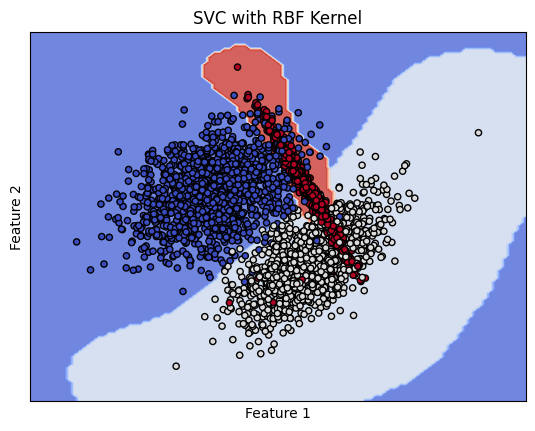

In [336]:
# DO NOT CHANGE THIS CELL, JUST RUN IT
ax = plt.axes()

disp = DecisionBoundaryDisplay.from_estimator(
        rbf_svm,
        X_train,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel="Feature 1",
        ylabel="Feature 2",
    )


ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = plt.cm.coolwarm, s = 20, edgecolors = "k")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("SVC with RBF Kernel")

The *Polynomial kernel function* takes two inputs, $x$ and $y$, which are the input data points. It first calculates the inner product between the two data points in the original feature space. It then raises the result to a user-defined power ($degree$) and adds a constant term ($coef_0$) to the result. The transformed value represents the similarity between the two data points in the higher-dimensional space.

The polynomial kernel function is expressed as:

$$K(x,y) = (\gamma<x,y> + coef_0)^{degree}$$

where $K(x,y)$ is the similarity score between input data points $x$ and $y$, gamma is a tuning parameter that controls the influence of the inner product, $coef_0$ is a constant term that shifts the result, degree is the degree of the polynomial function, $<x,y>$ is the inner product between the two data points.

**Call train_svm to inititalize a Support Vector Classifier (SVC) model and train it on the training data. This time, however, use Polynomial Function with Degree 3 as the kernel. Then find the test accuracy using linear_svm.score and print it.**

In [337]:
# ADD CODE HERE
# Initialize the SVC model with a Polynomial Kernel of Degree 3 (set "degree" to 3)
# Set the regularization parameter "C" to 1.0
# Set gamma to auto
# Call your earlier function train_svm
# Then use poly3_svm.score() to find the model's test accuracy
# Print the accuracy
# You must use the given variable names to store the model and accuracy!!

poly3_svm = train_svm(X_train, y_train, kernel="poly", degree=3, C=1, gamma="auto")
poly3_svm_accuracy = poly3_svm.score(X_test, y_test)
print("Polynomial Degree 3 SVM Model Performance:", poly3_svm_accuracy)

Polynomial Degree 3 SVM Model Performance: 0.883


Text(0.5, 1.0, 'SVC with Polynomial (Degree 3) Kernel')

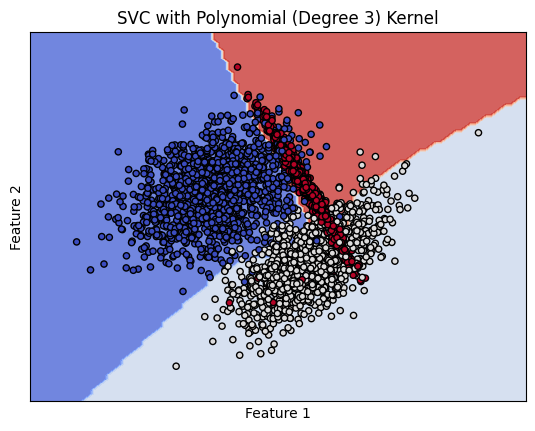

In [338]:
# DO NOT CHANGE THIS CELL, JUST RUN IT
ax = plt.axes()

disp = DecisionBoundaryDisplay.from_estimator(
        poly3_svm,
        X_train,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel="Feature 1",
        ylabel="Feature 2",
    )


ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = plt.cm.coolwarm, s = 20, edgecolors = "k")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("SVC with Polynomial (Degree 3) Kernel")

In class, we learned that a more complex model doesn't necessarily mean a better model. If the model becomes too complex, it will overfit the training data and perform poorly on the testing data. Now, we will see an example of this.

The Support Vector Classifier with a Polynomial Kernel of degree 3 gave a test accuracy of 88.3%. Now, let us train a Support Vector Classifier with a Polynomial Kernel of degree 4 (the latter is more complex than the former) and see how it performs.

**Call train_svm to inititalize a Support Vector Classifier (SVC) model and train it on the training data. This time, however, use Polynomial Function with Degree 4 as the kernel. Then find the test accuracy using linear_svm.score and print it.**

In [339]:
# ADD CODE HERE
# Initialize the SVC model with a Polynomial Kernel of Degree 4 (set "degree" to 4)
# Set the regularization parameter "C" to 1.0
# Set gamma to auto
# Call your earlier function train_svm
# Then use poly4_svm.score() to find the model's test accuracy
# Print the accuracy
# You must use the given variable names to store the model and accuracy!!

poly4_svm = train_svm(X_train, y_train, kernel="poly", degree=4, C=1, gamma="auto")
poly4_svm_accuracy = poly4_svm.score(X_test, y_test)
print("Polynomial Degree 4 SVM Model Performance:", poly4_svm_accuracy)

Polynomial Degree 4 SVM Model Performance: 0.556


Text(0.5, 1.0, 'SVC with Polynomial (Degree 4) Kernel')

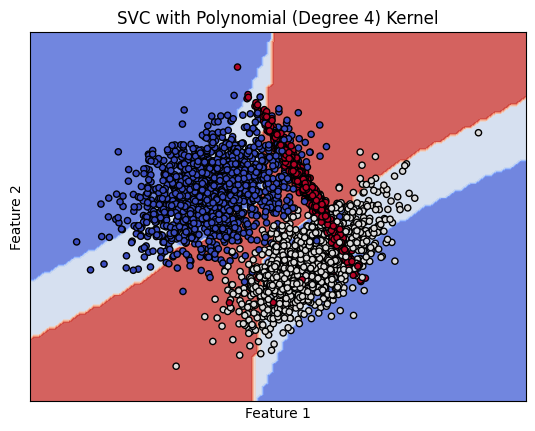

In [340]:
# DO NOT CHANGE THIS CELL, JUST RUN IT
ax = plt.axes()

disp = DecisionBoundaryDisplay.from_estimator(
        poly4_svm,
        X_train,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel="Feature 1",
        ylabel="Feature 2",
    )


ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = plt.cm.coolwarm, s = 20, edgecolors = "k")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("SVC with Polynomial (Degree 4) Kernel")

As it can be seen, the SVC model with Polynomial Degree 4 performs pretty poorly on the test data with an accuracy of 55.6%. A lesser complex model (SVC model with Polynomial Degree 3) is much better with a test accuracy of 88.3%.